In [1]:
import pandas as pd

In [2]:
dados = r'E:\Documentos\Cursos\Alura\ONE\Desafio-03\telecom_x.csv'

In [3]:
df = pd.read_csv(dados)

In [4]:
df = df.drop(columns=['customerID'])


## Convertendo a coluna Charges.Total para o tipo numérico

In [5]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


### remover os valores nulos


In [7]:
df = df.dropna(subset=['Churn', 'Charges.Total'])

In [8]:
#verificar se existem valores NaN
print(df.isnull().sum())

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### É preciso transformar as colunas categóricas em codificação para desenvolver o algoritmo de Machine Learning. 


In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
colunas_categoricas = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
df_categorico = df[colunas_categoricas]

In [12]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_array = encoder.fit_transform(df_categorico)

In [13]:
novas_colunas = encoder.get_feature_names_out(colunas_categoricas)
df_encoded = pd.DataFrame(encoded_array, columns=novas_colunas, index=df.index)

In [14]:
df_encoded.head()

,Churn_No,Churn_Yes,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [15]:
df_numerico = df.drop(columns=colunas_categoricas)

In [16]:
df_codificado = pd.concat([df_numerico, df_encoded], axis=1)

In [17]:
df_codificado.head()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Churn_No,Churn_Yes,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.6,593.30,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,9,59.9,542.40,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,4,73.9,280.85,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,13,98.0,1237.85,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,3,83.9,267.40,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [18]:
df_codificado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   Charges.Monthly                          7032 non-null   float64
 3   Charges.Total                            7032 non-null   float64
 4   Churn_No                                 7032 non-null   float64
 5   Churn_Yes                                7032 non-null   float64
 6   gender_Female                            7032 non-null   float64
 7   gender_Male                              7032 non-null   float64
 8   Partner_No                               7032 non-null   float64
 9   Partner_Yes                              7032 non-null   float64
 10  Dependents_No                            7032 non-nul

In [20]:
colunas_para_remover = ['Churn_No', 'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']
df_codificado = df_codificado.drop(columns=colunas_para_remover)

In [21]:
df_codificado.head()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.6,593.30,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,9,59.9,542.40,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,4,73.9,280.85,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,13,98.0,1237.85,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,3,83.9,267.40,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [22]:
matriz_corr = df_codificado.corr().round(2)

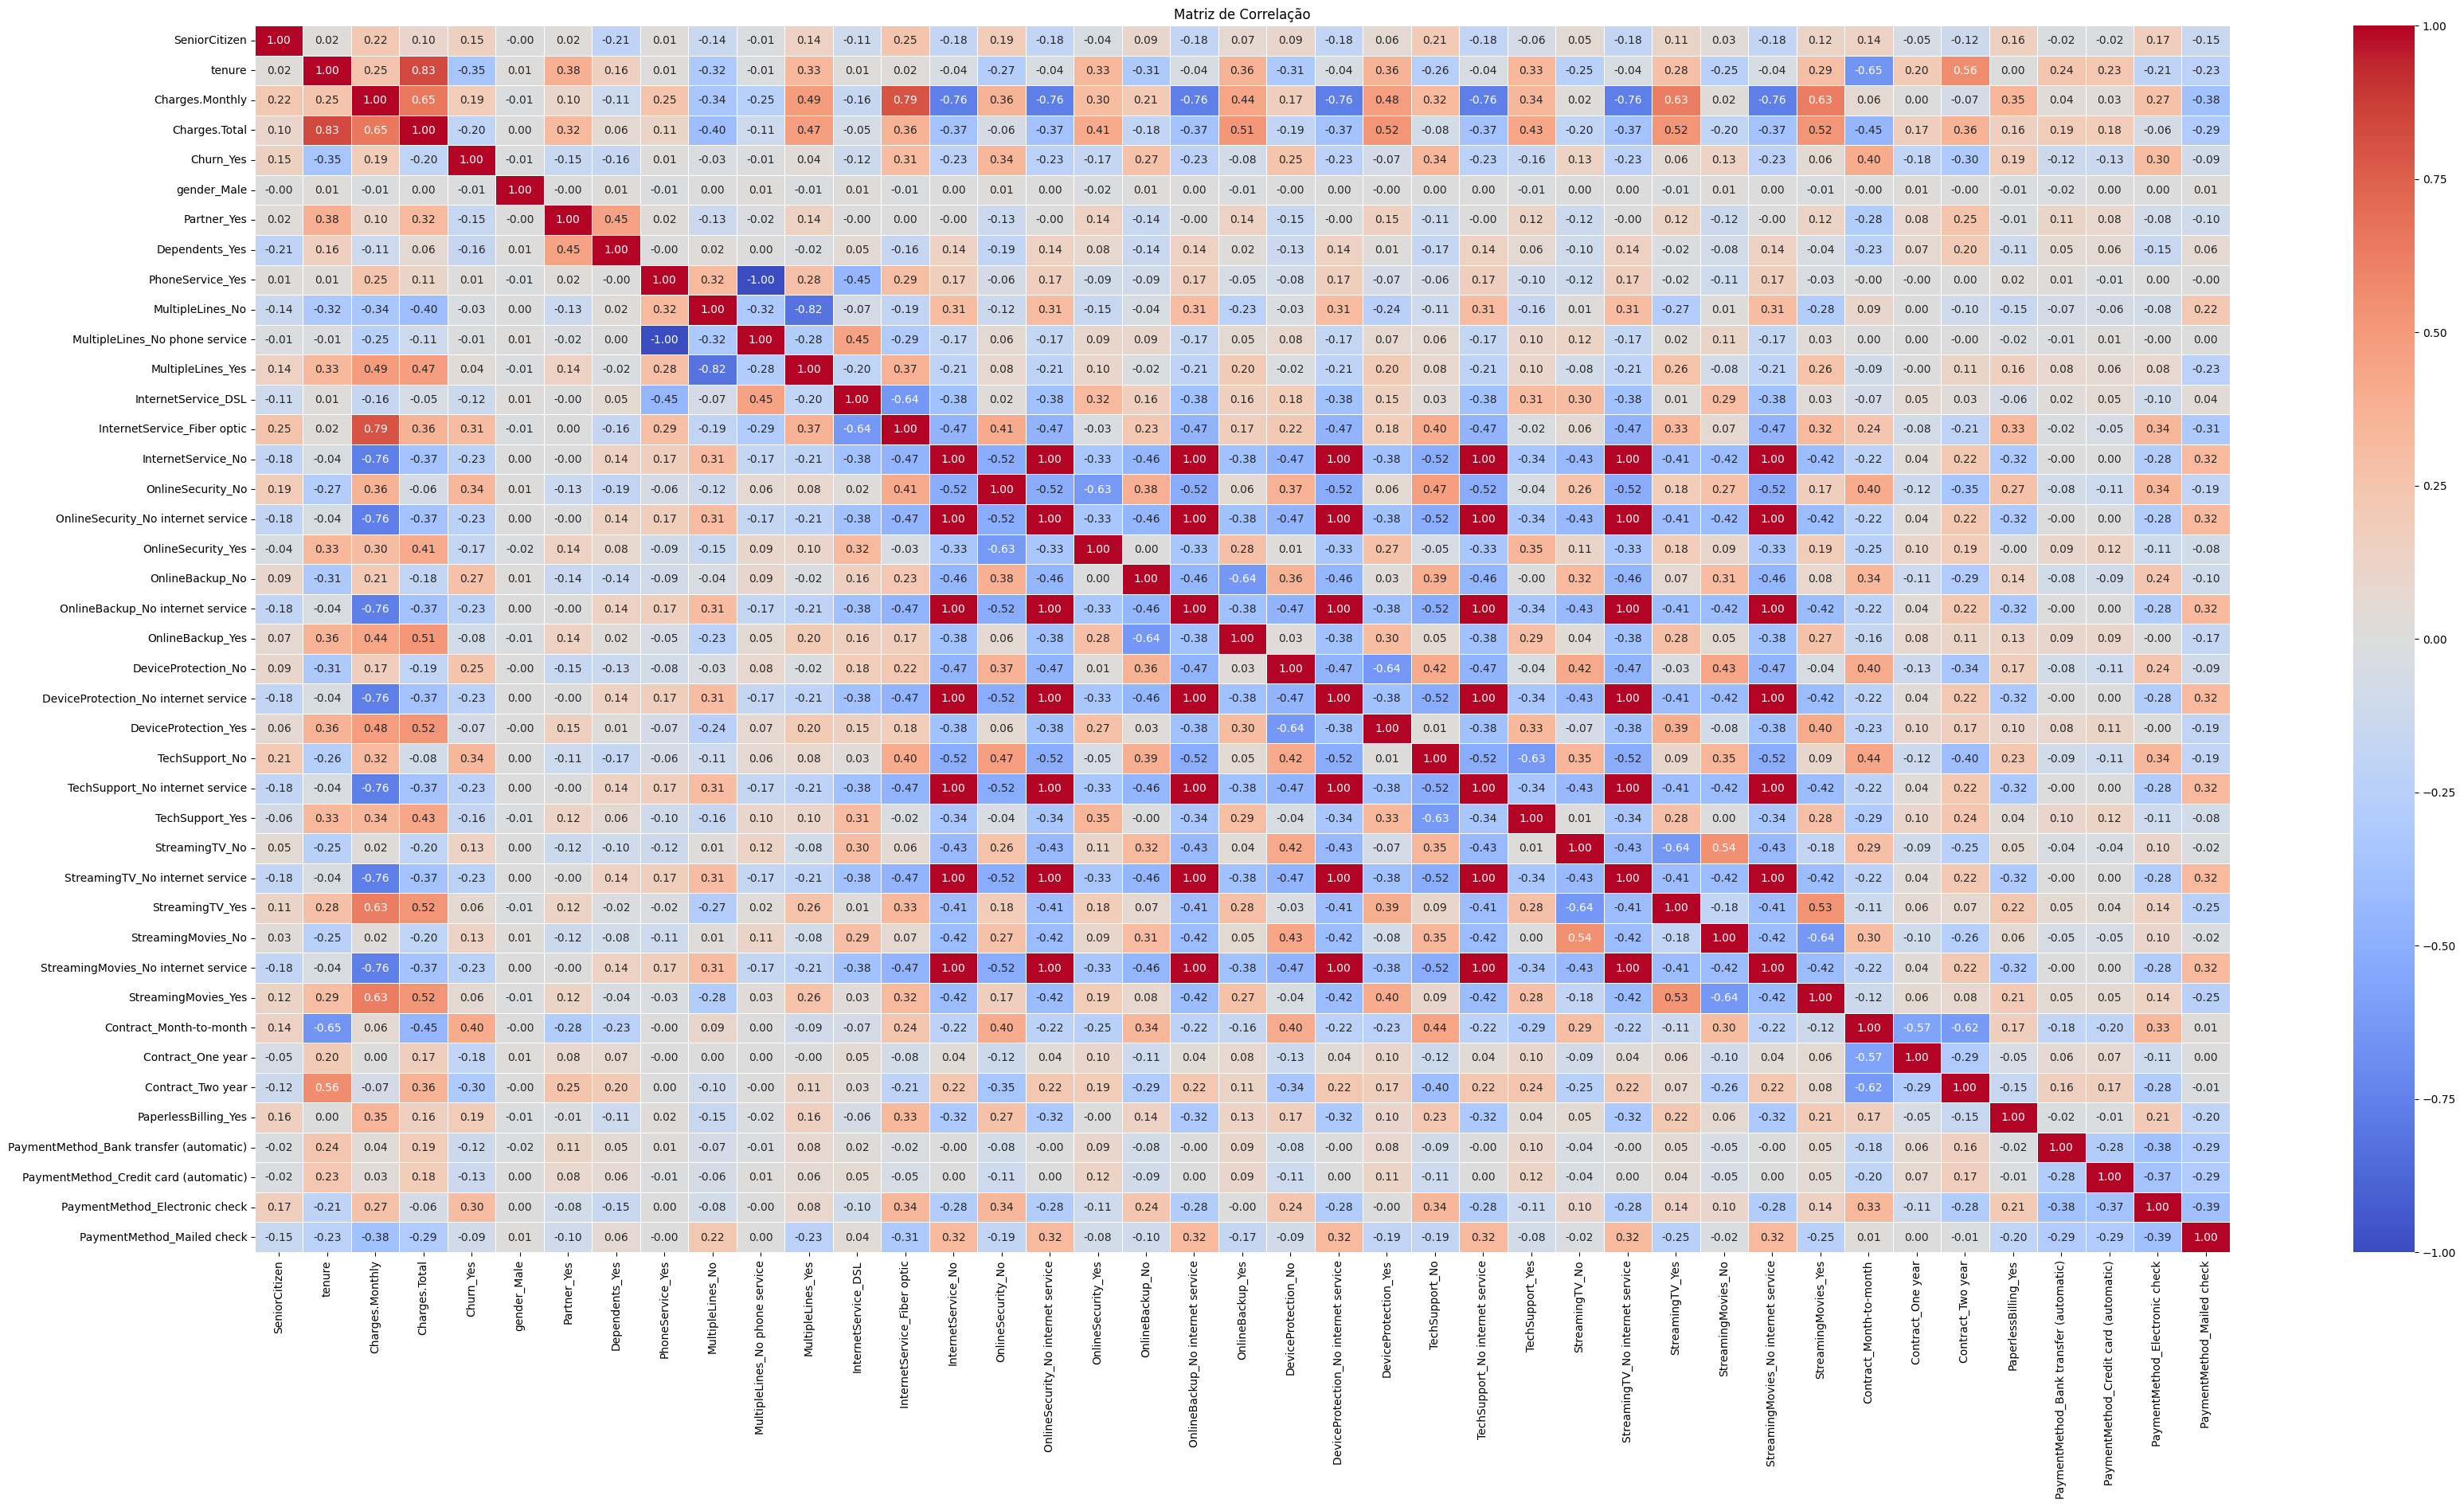

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40, 20))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

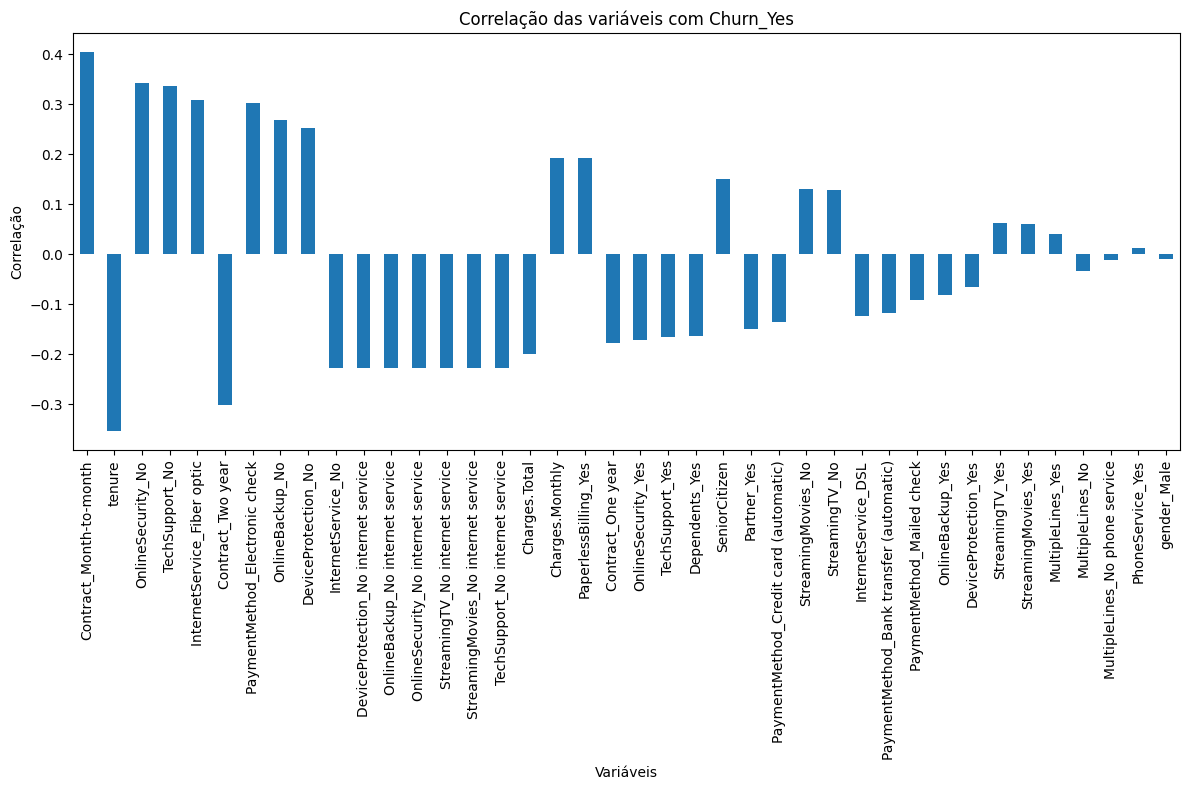

In [24]:
# Calcula a correlação de todas as variáveis com 'Churn_Yes'
correlacoes = df_codificado.corr()['Churn_Yes'].drop('Churn_Yes').sort_values(key=abs, ascending=False)

# Plota um gráfico de barras
plt.figure(figsize=(12, 8))
correlacoes.plot(kind='bar')
plt.title('Correlação das variáveis com Churn_Yes')
plt.ylabel('Correlação')
plt.xlabel('Variáveis')
plt.tight_layout()
plt.show()

Proporção de clientes que permaneceram (0): 73.42%
Proporção de clientes que evadiram (1): 26.58%


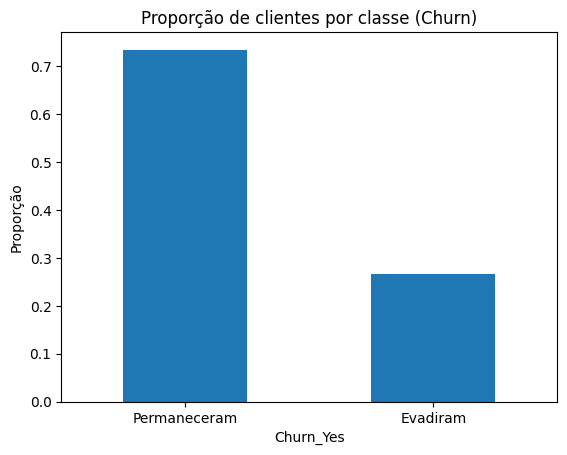

In [25]:
# Calculando a proporção de clientes que evadiram e que permaneceram
proporcao = df_codificado['Churn_Yes'].value_counts(normalize=True)
print("Proporção de clientes que permaneceram (0): {:.2%}".format(proporcao[0]))
print("Proporção de clientes que evadiram (1): {:.2%}".format(proporcao[1]))

# Visualizando o desequilíbrio das classes
import matplotlib.pyplot as plt
proporcao.plot(kind='bar')
plt.xticks([0, 1], ['Permaneceram', 'Evadiram'], rotation=0)
plt.ylabel('Proporção')
plt.title('Proporção de clientes por classe (Churn)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separando features e target
X = df_codificado.drop('Churn_Yes', axis=1)
y = df_codificado['Churn_Yes']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



In [29]:
# Aplicando SMOTE apenas nos dados de treino
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

Churn_Yes
1.0    3614
0.0    3614
Name: count, dtype: int64
Churn_Yes
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


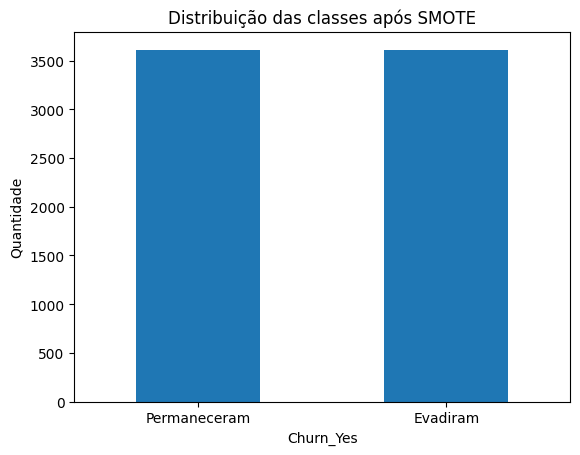

In [30]:
# Verificando a distribuição das classes após o SMOTE
print(y_train_bal.value_counts())
print(y_train_bal.value_counts(normalize=True))

# Visualizando em gráfico
import matplotlib.pyplot as plt
y_train_bal.value_counts().plot(kind='bar')
plt.xticks([0, 1], ['Permaneceram', 'Evadiram'], rotation=0)
plt.ylabel('Quantidade')
plt.title('Distribuição das classes após SMOTE')
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Treinando o modelo com os dados balanceados de treino
modelo_lr = LogisticRegression(max_iter=1000, random_state=42)
modelo_lr.fit(X_train_bal, y_train_bal)

# Fazendo previsões no conjunto de teste original (não balanceado)
y_pred = modelo_lr.predict(X_test)

# Avaliando o desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.7440758293838863

Matriz de Confusão:
 [[1128  421]
 [ 119  442]]

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.90      0.73      0.81      1549
         1.0       0.51      0.79      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.76      2110



c:\Users\Public\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
